# Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the file

In [2]:
df = pd.read_excel('merged_GWAS_data.xlsx')
df.head()

,DATE ADDED TO CATALOG,PUBMEDID,FIRST AUTHOR,DATE,JOURNAL,LINK,STUDY,DISEASE/TRAIT,REPLICATION SAMPLE SIZE,REGION,...,PLATFORM [SNPS PASSING QC],CNV,MAPPED_TRAIT,MAPPED_TRAIT_URI,STUDY ACCESSION,GENOTYPING TECHNOLOGY,INITIAL,SAMPLE,SIZE,INITIAL SAMPLE SIZE
0,2017-06-02,28256260,Siitonen A,2017-02-02,Neurobiol Aging,www.ncbi.nlm.nih.gov/pubmed/28256260,Genetics of early-onset Parkinson's disease in...,Early-onset Parkinson's disease,NaN,NaN,...,NR [12954715] (imputed),N,Young adult-onset Parkinsonism,http://www.orpha.net/ORDO/Orphanet_2828,GCST004138,Genome-wide genotyping array,403.0,Finnish,ancestry,NaN
1,2017-06-02,28256260,Siitonen A,2017-02-02,Neurobiol Aging,www.ncbi.nlm.nih.gov/pubmed/28256260,Genetics of early-onset Parkinson's disease in...,Early-onset Parkinson's disease,NaN,NaN,...,NR [12954715] (imputed),N,Young adult-onset Parkinsonism,http://www.orpha.net/ORDO/Orphanet_2828,GCST004138,Genome-wide genotyping array,403.0,Finnish,ancestry,NaN
2,2017-06-02,28256260,Siitonen A,2017-02-02,Neurobiol Aging,www.ncbi.nlm.nih.gov/pubmed/28256260,Genetics of early-onset Parkinson's disease in...,Early-onset Parkinson's disease,NaN,NaN,...,NR [12954715] (imputed),N,Young adult-onset Parkinsonism,http://www.orpha.net/ORDO/Orphanet_2828,GCST004138,Genome-wide genotyping array,403.0,Finnish,ancestry,NaN
3,2017-06-02,28256260,Siitonen A,2017-02-02,Neurobiol Aging,www.ncbi.nlm.nih.gov/pubmed/28256260,Genetics of early-onset Parkinson's disease in...,Early-onset Parkinson's disease,NaN,NaN,...,NR [12954715] (imputed),N,Young adult-onset Parkinsonism,http://www.orpha.net/ORDO/Orphanet_2828,GCST004138,Genome-wide genotyping array,403.0,Finnish,ancestry,NaN
4,2017-06-02,28256260,Siitonen A,2017-02-02,Neurobiol Aging,www.ncbi.nlm.nih.gov/pubmed/28256260,Genetics of early-onset Parkinson's disease in...,Early-onset Parkinson's disease,NaN,NaN,...,NR [12954715] (imputed),N,Young adult-onset Parkinsonism,http://www.orpha.net/ORDO/Orphanet_2828,GCST004138,Genome-wide genotyping array,403.0,Finnish,ancestry,NaN


In [3]:
# Step 1: Check total missing values in each column
print("Step 1: Missing values count in each column:")
print(df.isnull().sum())

Step 1: Missing values count in each column:
DATE ADDED TO CATALOG            0
PUBMEDID                         0
FIRST AUTHOR                     0
DATE                             0
JOURNAL                          0
LINK                             0
STUDY                            0
DISEASE/TRAIT                    0
REPLICATION SAMPLE SIZE        888
REGION                          64
CHR_ID                          76
CHR_POS                         64
REPORTED GENE(S)               458
MAPPED_GENE                     64
UPSTREAM_GENE_ID              1152
DOWNSTREAM_GENE_ID            1152
SNP_GENE_IDS                   460
UPSTREAM_GENE_DISTANCE        1152
DOWNSTREAM_GENE_DISTANCE      1152
STRONGEST SNP-RISK ALLELE        0
SNPS                             0
MERGED                           0
SNP_ID_CURRENT                  64
CONTEXT                         64
INTERGENIC                       0
RISK ALLELE FREQUENCY            0
P-VALUE                          0
PVALUE_MLO

In [4]:
# Step 2: Check percentage of missing values
print("\
Step 2: Percentage of missing values in each column:")
print((df.isnull().sum() / len(df) * 100).round(2))

Step 2: Percentage of missing values in each column:
DATE ADDED TO CATALOG          0.00
PUBMEDID                       0.00
FIRST AUTHOR                   0.00
DATE                           0.00
JOURNAL                        0.00
LINK                           0.00
STUDY                          0.00
DISEASE/TRAIT                  0.00
REPLICATION SAMPLE SIZE       57.36
REGION                         4.13
CHR_ID                         4.91
CHR_POS                        4.13
REPORTED GENE(S)              29.59
MAPPED_GENE                    4.13
UPSTREAM_GENE_ID              74.42
DOWNSTREAM_GENE_ID            74.42
SNP_GENE_IDS                  29.72
UPSTREAM_GENE_DISTANCE        74.42
DOWNSTREAM_GENE_DISTANCE      74.42
STRONGEST SNP-RISK ALLELE      0.00
SNPS                           0.00
MERGED                         0.00
SNP_ID_CURRENT                 4.13
CONTEXT                        4.13
INTERGENIC                     0.00
RISK ALLELE FREQUENCY          0.00
P-VALUE    

In [5]:
# Let's first check the data types of our columns
print("Data types of columns:")
print(df.dtypes)

Data types of columns:
DATE ADDED TO CATALOG         datetime64[ns]
PUBMEDID                               int64
FIRST AUTHOR                          object
DATE                          datetime64[ns]
JOURNAL                               object
LINK                                  object
STUDY                                 object
DISEASE/TRAIT                         object
REPLICATION SAMPLE SIZE               object
REGION                                object
CHR_ID                               float64
CHR_POS                              float64
REPORTED GENE(S)                      object
MAPPED_GENE                           object
UPSTREAM_GENE_ID                      object
DOWNSTREAM_GENE_ID                    object
SNP_GENE_IDS                          object
UPSTREAM_GENE_DISTANCE               float64
DOWNSTREAM_GENE_DISTANCE             float64
STRONGEST SNP-RISK ALLELE             object
SNPS                                  object
MERGED                          

In [6]:
# Let's also look at some unique values in problematic columns
print("\Sample values in REPLICATION SAMPLE SIZE:")
print(df['REPLICATION SAMPLE SIZE'].unique()[:10])

\Sample values in REPLICATION SAMPLE SIZE:
[nan
 "1,528 Northern European ancestry sporadic Parkinson's disease cases, 707 Northern European ancestry familial Parkinson's disease cases, 796 Northern European ancestry controls"
 '737 Northern European ancestry cases' '7,053 cases, 9,007 controls'
 'Up to 1,447 cases, 1,468 controls'
 '269 Northern European ancestry cases, 272 Northern European ancestry controls, 62 cases, 60 controls, 1 Asian ancestry case'
 '933 Japanese ancestry cases, 15,753 Japanese ancestry controls'
 '1,782 Northern European ancestry cases, 1,658 Northern European ancestry controls'
 '726 Northern European ancestry cases'
 '1,490 Chinese ancestry individuals']


# Handling Missing Values

In [7]:
# based on the data type of each column

# 1. For datetime columns - fill with the median date
df['DATE ADDED TO CATALOG'].fillna(df['DATE ADDED TO CATALOG'].median(), inplace=True)
df['DATE'].fillna(df['DATE'].median(), inplace=True)

# 2. For text/categorical columns - fill with 'Unknown'
categorical_cols = ['FIRST AUTHOR', 'JOURNAL', 'LINK', 'STUDY', 'DISEASE/TRAIT', 
                   'REGION', 'REPORTED GENE(S)', 'MAPPED_GENE', 'SNP_GENE_IDS', 
                   'STRONGEST SNP-RISK ALLELE', 'SNPS', 'SNP_ID_CURRENT', 'CONTEXT']
for col in categorical_cols:
    df[col].fillna('Unknown', inplace=True)

# 3. For numeric ID columns - fill with -1
id_cols = ['CHR_ID', 'CHR_POS', 'UPSTREAM_GENE_ID', 'DOWNSTREAM_GENE_ID', 
           'UPSTREAM_GENE_DISTANCE', 'DOWNSTREAM_GENE_DISTANCE']
for col in id_cols:
    df[col].fillna(-1, inplace=True)

# 4. For REPLICATION SAMPLE SIZE - fill with 'No replication sample'
df['REPLICATION SAMPLE SIZE'].fillna('No replication sample', inplace=True)

# Check remaining missing values
print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
DATE ADDED TO CATALOG            0
PUBMEDID                         0
FIRST AUTHOR                     0
DATE                             0
JOURNAL                          0
LINK                             0
STUDY                            0
DISEASE/TRAIT                    0
REPLICATION SAMPLE SIZE          0
REGION                           0
CHR_ID                           0
CHR_POS                          0
REPORTED GENE(S)                 0
MAPPED_GENE                      0
UPSTREAM_GENE_ID                 0
DOWNSTREAM_GENE_ID               0
SNP_GENE_IDS                     0
UPSTREAM_GENE_DISTANCE           0
DOWNSTREAM_GENE_DISTANCE         0
STRONGEST SNP-RISK ALLELE        0
SNPS                             0
MERGED                           0
SNP_ID_CURRENT                   0
CONTEXT                          0
INTERGENIC                       0
RISK ALLELE FREQUENCY            0
P-VALUE                          0
PVALUE_MLOG             

In [8]:
# For P-VALUE (TEXT), OR or BETA, and 95% CI (TEXT)
df['P-VALUE (TEXT)'].fillna('Not reported', inplace=True)
df['OR or BETA'].fillna(-999, inplace=True)  # Using -999 as a sentinel value
df['95% CI (TEXT)'].fillna('Not reported', inplace=True)

# For INITIAL, SAMPLE, SIZE, and INITIAL SAMPLE SIZE columns
df['INITIAL'].fillna('Not specified', inplace=True)
df['SAMPLE'].fillna('Not specified', inplace=True)
df['SIZE'].fillna(-1, inplace=True)  # Using -1 for missing numeric values
df['INITIAL SAMPLE SIZE'].fillna('Not specified', inplace=True)

# Final check for any remaining missing values
print("Final check - Missing values after complete handling:")
print(df.isnull().sum())

Final check - Missing values after complete handling:
DATE ADDED TO CATALOG         0
PUBMEDID                      0
FIRST AUTHOR                  0
DATE                          0
JOURNAL                       0
LINK                          0
STUDY                         0
DISEASE/TRAIT                 0
REPLICATION SAMPLE SIZE       0
REGION                        0
CHR_ID                        0
CHR_POS                       0
REPORTED GENE(S)              0
MAPPED_GENE                   0
UPSTREAM_GENE_ID              0
DOWNSTREAM_GENE_ID            0
SNP_GENE_IDS                  0
UPSTREAM_GENE_DISTANCE        0
DOWNSTREAM_GENE_DISTANCE      0
STRONGEST SNP-RISK ALLELE     0
SNPS                          0
MERGED                        0
SNP_ID_CURRENT                0
CONTEXT                       0
INTERGENIC                    0
RISK ALLELE FREQUENCY         0
P-VALUE                       0
PVALUE_MLOG                   0
P-VALUE (TEXT)                0
OR or BETA        

# Save Clean Dataset

In [9]:
# Save the cleaned dataset
df.to_excel('cleaned_GWAS_data.xlsx', index=False)
print("\
Cleaned data has been saved to 'cleaned_GWAS_data.xlsx'")

Cleaned data has been saved to 'cleaned_GWAS_data.xlsx'


# Read the clean Dataset file

In [10]:
df_cleaned = pd.read_excel('cleaned_GWAS_data.xlsx')

In [11]:
# Display the first few rows to understand the structure
print("Head of the cleaned dataset:")
print(df_cleaned.head())

Head of the cleaned dataset:
  DATE ADDED TO CATALOG  PUBMEDID FIRST AUTHOR       DATE          JOURNAL  \
0            2017-06-02  28256260   Siitonen A 2017-02-02  Neurobiol Aging   
1            2017-06-02  28256260   Siitonen A 2017-02-02  Neurobiol Aging   
2            2017-06-02  28256260   Siitonen A 2017-02-02  Neurobiol Aging   
3            2017-06-02  28256260   Siitonen A 2017-02-02  Neurobiol Aging   
4            2017-06-02  28256260   Siitonen A 2017-02-02  Neurobiol Aging   

                                   LINK  \
0  www.ncbi.nlm.nih.gov/pubmed/28256260   
1  www.ncbi.nlm.nih.gov/pubmed/28256260   
2  www.ncbi.nlm.nih.gov/pubmed/28256260   
3  www.ncbi.nlm.nih.gov/pubmed/28256260   
4  www.ncbi.nlm.nih.gov/pubmed/28256260   

                                               STUDY  \
0  Genetics of early-onset Parkinson's disease in...   
1  Genetics of early-onset Parkinson's disease in...   
2  Genetics of early-onset Parkinson's disease in...   
3  Genetics of earl

In [12]:
# Display basic statistics to understand the data distribution
print("\Basic statistics of the dataset:")
print(df_cleaned.describe(include='all'))

\Basic statistics of the dataset:
                DATE ADDED TO CATALOG      PUBMEDID FIRST AUTHOR  \
count                            1548  1.548000e+03         1548   
unique                            NaN           NaN           52   
top                               NaN           NaN     Nalls MA   
freq                              NaN           NaN          288   
mean    2019-08-16 00:20:27.906976768  3.134777e+07          NaN   
min               2008-06-16 00:00:00  1.625223e+07          NaN   
25%               2017-05-11 00:00:00  2.740288e+07          NaN   
50%               2020-01-27 00:00:00  3.170189e+07          NaN   
75%               2023-06-22 00:00:00  3.675952e+07          NaN   
max               2024-05-15 00:00:00  3.815533e+07          NaN   
std                               NaN  5.489399e+06          NaN   

                                 DATE    JOURNAL  \
count                            1548       1548   
unique                            NaN        

# Explore the dataset to identify key patterns and trends

# Question No. 1 = What is the distribution of Parkinson's disease subtypes in the studies?

In [13]:
# Count of studies per disease/trait
disease_counts = df_cleaned['DISEASE/TRAIT'].value_counts().head(10)
print("Top 10 diseases/traits by study count:")
print(disease_counts)

Top 10 diseases/traits by study count:
DISEASE/TRAIT
Parkinson's disease                                                                    966
Parkinson's disease or first degree relation to individual with Parkinson's disease    214
Parkinson disease                                                                       74
Parkinson's disease progression (cognitive)                                             40
Parkinson's disease (age of onset)                                                      26
Early-onset Parkinson's disease                                                         26
Levodopa-induced dyskinesia in levodopa treated Parkinson's disease                     24
Parkinson disease and lewy body pathology                                               20
Parkinson's disease progression (motor)                                                 20
Parkinson's disease progression (composite)                                             20
Name: count, dtype: int64


# Question No. 2 = Which genomic regions are most frequently associated with Parkinson's disease? 

In [14]:
# Count of studies per region
region_counts = df_cleaned['REGION'].value_counts().head(10)
print("\Top 10 regions by study count:")
print(region_counts)

\Top 10 regions by study count:
REGION
4q22.1      98
17q21.31    78
1q22        72
Unknown     64
12q12       64
4p16.3      44
1q32.1      42
1q21.3      30
4q21.1      28
4p15.32     26
Name: count, dtype: int64


# Question No. 3 = How has the research timeline evolved since 2008?

In [15]:
# Timeline of studies
study_timeline = df_cleaned['DATE ADDED TO CATALOG'].value_counts().sort_index()
print("\Timeline of studies (first 10 dates):")
print(study_timeline.head(10))

\Timeline of studies (first 10 dates):
DATE ADDED TO CATALOG
2008-06-16     8
2008-12-09     2
2009-10-05    10
2009-12-10    28
2010-02-05    12
2010-09-22     8
2011-01-03     6
2011-01-06     6
2011-07-20    22
2011-09-14     6
Name: count, dtype: int64


# Question No. 4 = Who are the most prolific researchers in this field?

In [16]:
# Top authors by number of studies
author_counts = df_cleaned['FIRST AUTHOR'].value_counts().head(10)
print("\Top 10 authors by number of studies:")
print(author_counts)

\Top 10 authors by number of studies:
FIRST AUTHOR
Nalls MA       288
Kim JJ         242
Smeland OB     110
Chang D        110
Rahman MA       74
Tan MMX         60
Pickrell JK     50
Hu Y            44
Pan H           38
Pankratz N      36
Name: count, dtype: int64


# Charts & Graphs

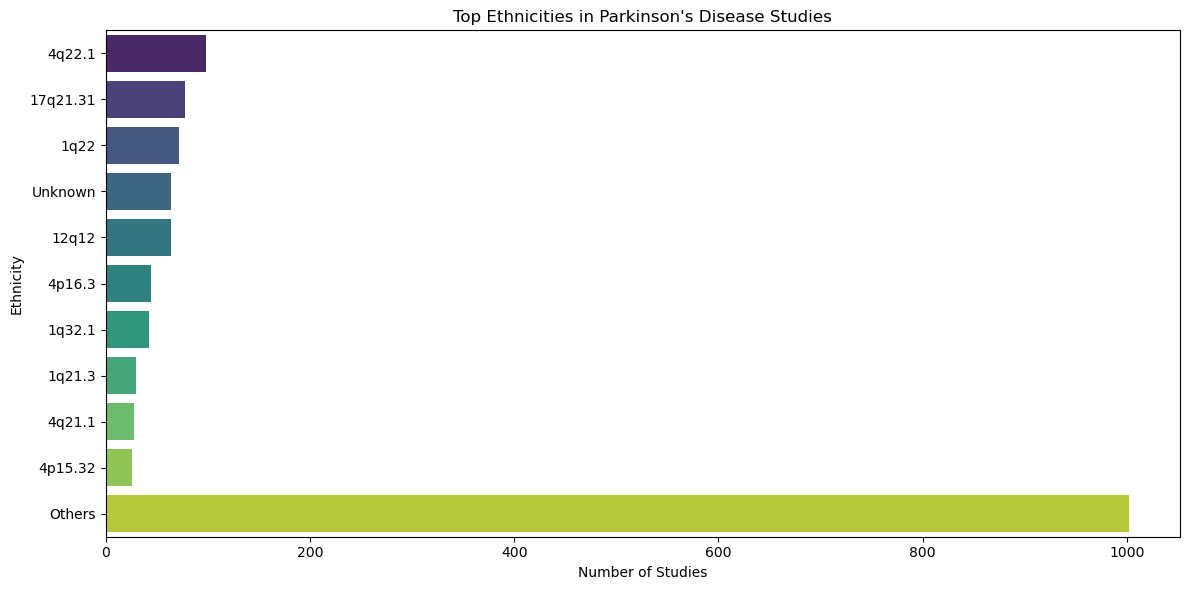

Number of studies by ethnicity (Top 10 + Others):
4q22.1        98
17q21.31      78
1q22          72
Unknown       64
12q12         64
4p16.3        44
1q32.1        42
1q21.3        30
4q21.1        28
4p15.32       26
Others      1002
dtype: int64


In [17]:
# Filter for Parkinson's disease-related studies
parkinsons_df = df[df['DISEASE/TRAIT'].str.contains('Parkinson', case=False, na=False)]

# Count studies by ethnicity
ethnicity_counts = parkinsons_df['REGION'].value_counts()

# Combine remaining counts into 'Others'
top_10_ethnicities = ethnicity_counts.head(10)
others_count = ethnicity_counts.iloc[10:].sum()

# Add 'Others' to the top 10 data
ethnicity_summary = pd.concat([top_10_ethnicities, pd.Series({'Others': others_count})])

# Create a bar plot for summarized data
plt.figure(figsize=(12, 6))
sns.barplot(x=ethnicity_summary.values, y=ethnicity_summary.index, palette='viridis')
plt.title("Top Ethnicities in Parkinson's Disease Studies")
plt.xlabel('Number of Studies')
plt.ylabel('Ethnicity')
plt.tight_layout()
plt.show()

# Print the summarized counts
print("Number of studies by ethnicity (Top 10 + Others):")
print(ethnicity_summary)


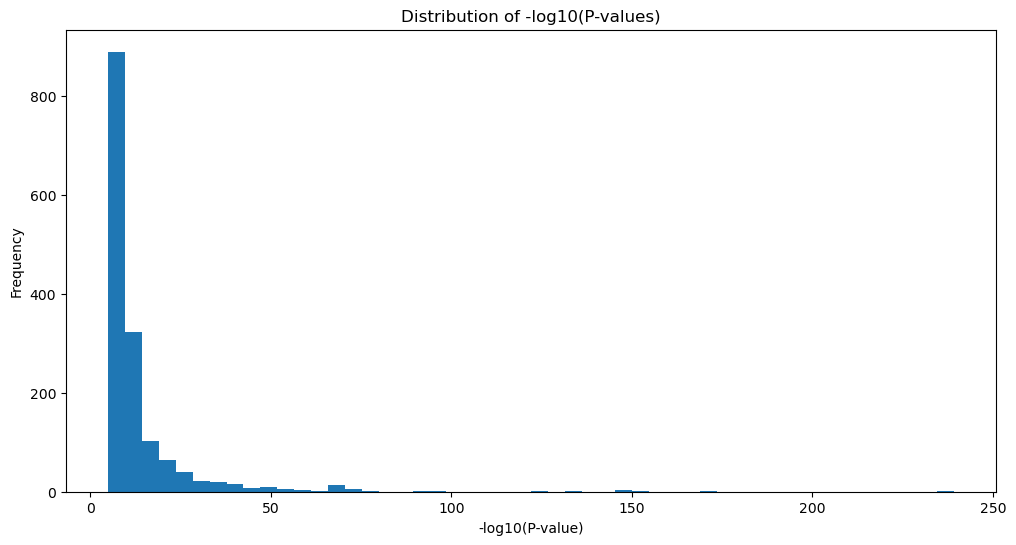

In [18]:
# P-value distribution analysis
plt.figure(figsize=(12, 6))
plt.hist(df_cleaned['PVALUE_MLOG'], bins=50)
plt.title('Distribution of -log10(P-values)')
plt.xlabel('-log10(P-value)')
plt.ylabel('Frequency')
plt.show()

\Top Risk Allele Frequencies:
RISK ALLELE FREQUENCY
NR      844
0.08     10
0.41     10
0.22      8
0.03      8
Name: count, dtype: int64


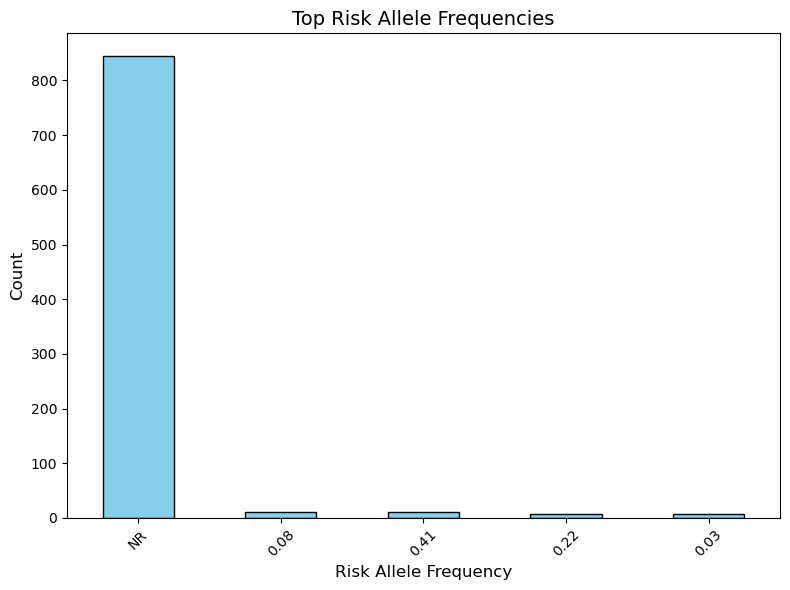

In [19]:
# Risk allele frequency analysis
raf_stats = df_cleaned['RISK ALLELE FREQUENCY'].value_counts().head()
print("\Top Risk Allele Frequencies:")
print(raf_stats)

plt.figure(figsize=(8, 6))
raf_stats.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title('Top Risk Allele Frequencies', fontsize=14)
plt.xlabel('Risk Allele Frequency', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

# Display the bar chart
plt.tight_layout()
plt.show()

\Top 10 Journals publishing GWAS studies:
JOURNAL
Nat Genet             514
Lancet Neurol         228
Biol Psychiatry       110
Mov Disord             96
NPJ Parkinsons Dis     80
Front Genet            74
Ann Neurol             48
Mol Neurobiol          44
Front Neurol           36
Hum Mol Genet          36
Name: count, dtype: int64


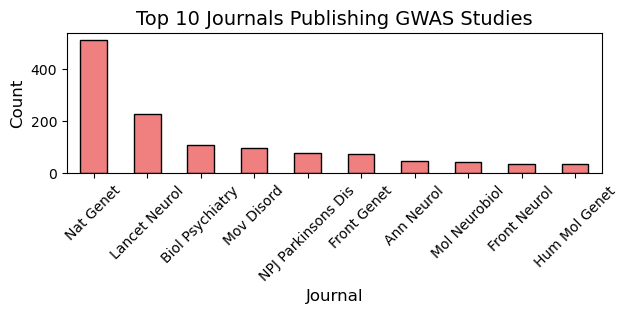

In [20]:
# Journal distribution
journal_counts = df_cleaned['JOURNAL'].value_counts().head(10)
print("\Top 10 Journals publishing GWAS studies:")
print(journal_counts)

plt.subplot(2, 1, 2)
journal_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Top 10 Journals Publishing GWAS Studies', fontsize=14)
plt.xlabel('Journal', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [21]:
# Genotyping technology trends
tech_counts = df_cleaned['GENOTYPING TECHNOLOGY'].value_counts()
print("\
Genotyping Technologies Used:")
print(tech_counts)

Genotyping Technologies Used:
GENOTYPING TECHNOLOGY
Genome-wide genotyping array                                                                                                                                                                                                                                                                                                                                                        1374
Genome-wide genotyping array, Genome-wide sequencing                                                                                                                                                                                                                                                                                                                                  98
Genome-wide sequencing                                                                                                                                                                            

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_18032\2219988808.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


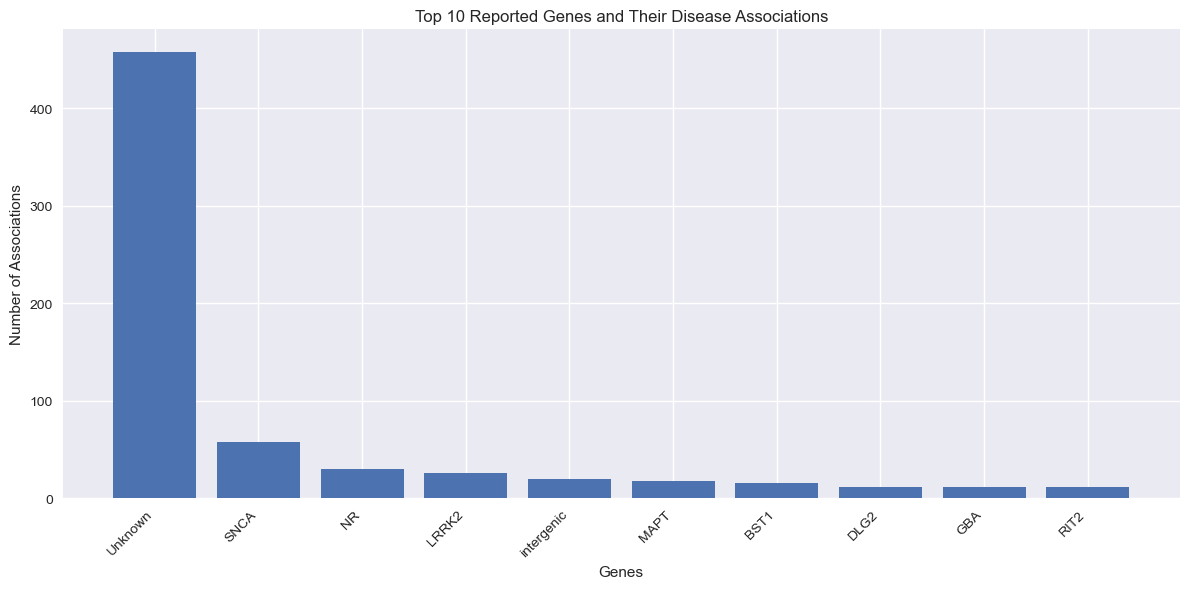

In [22]:
# Set style for better visualization
plt.style.use('seaborn')

# Genetic Correlation Analysis
plt.figure(figsize=(12, 6))
gene_disease = df_cleaned.groupby(['REPORTED GENE(S)', 'DISEASE/TRAIT']).size().reset_index(name='count')
top_genes = gene_disease.groupby('REPORTED GENE(S)')['count'].sum().nlargest(10)

plt.bar(range(len(top_genes)), top_genes.values)
plt.xticks(range(len(top_genes)), top_genes.index, rotation=45, ha='right')
plt.title('Top 10 Reported Genes and Their Disease Associations')
plt.xlabel('Genes')
plt.ylabel('Number of Associations')
plt.tight_layout()
plt.show()

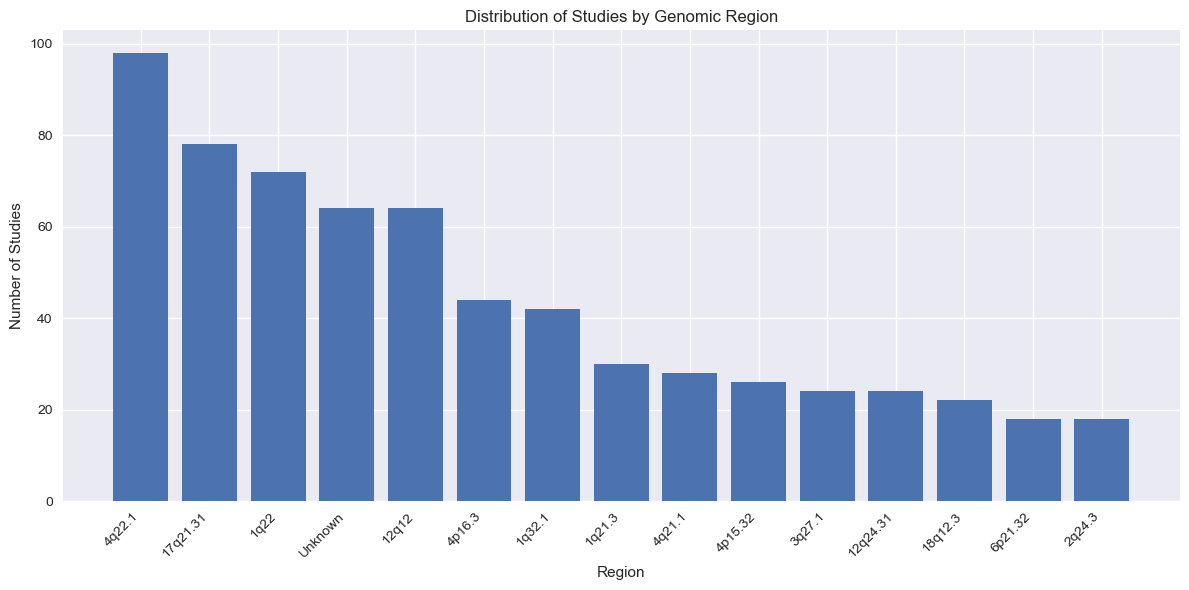

In [23]:
# Geographic Distribution (using REGION as proxy)
plt.figure(figsize=(12, 6))
region_counts = df_cleaned['REGION'].value_counts().head(15)
plt.bar(range(len(region_counts)), region_counts.values)
plt.xticks(range(len(region_counts)), region_counts.index, rotation=45, ha='right')
plt.title('Distribution of Studies by Genomic Region')
plt.xlabel('Region')
plt.ylabel('Number of Studies')
plt.tight_layout()
plt.show()

In [24]:
# Print some statistics about treatment implications
print("\
12. Treatment Implications - Gene Associations:")
treatment_genes = df_cleaned.groupby('REPORTED GENE(S)')['OR or BETA'].agg(['mean', 'count']).sort_values('count', ascending=False).head(10)
print(treatment_genes)

12. Treatment Implications - Gene Associations:
                        mean  count
REPORTED GENE(S)                   
Unknown          -544.820508    458
SNCA              -33.484981     58
NR                  1.098680     30
LRRK2               2.294046     26
intergenic          1.447000     20
MAPT                1.329770     18
BST1             -124.122825     16
RIT2             -165.899612     12
DLG2             -165.285389     12
SH3GL2              0.602691     12


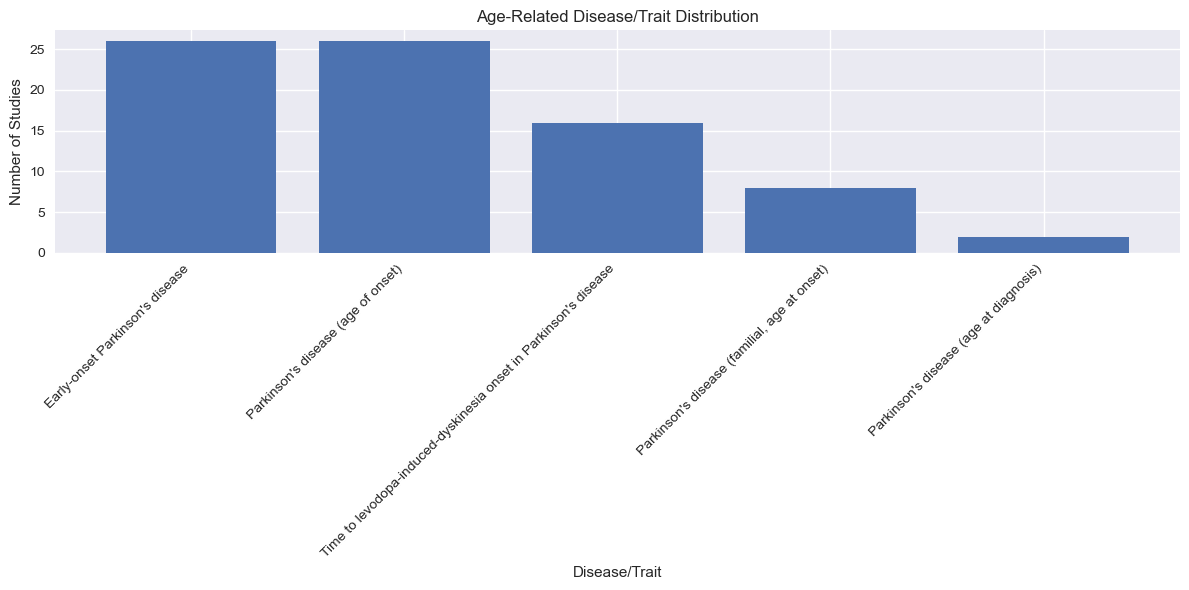

In [25]:
# Age-Related Patterns
age_related = df_cleaned[df_cleaned['DISEASE/TRAIT'].str.contains('age|onset', case=False, na=False)]
plt.figure(figsize=(12, 6))
age_counts = age_related['DISEASE/TRAIT'].value_counts().head(10)
plt.bar(range(len(age_counts)), age_counts.values)
plt.xticks(range(len(age_counts)), age_counts.index, rotation=45, ha='right')
plt.title('Age-Related Disease/Trait Distribution')
plt.xlabel('Disease/Trait')
plt.ylabel('Number of Studies')
plt.tight_layout()
plt.show()

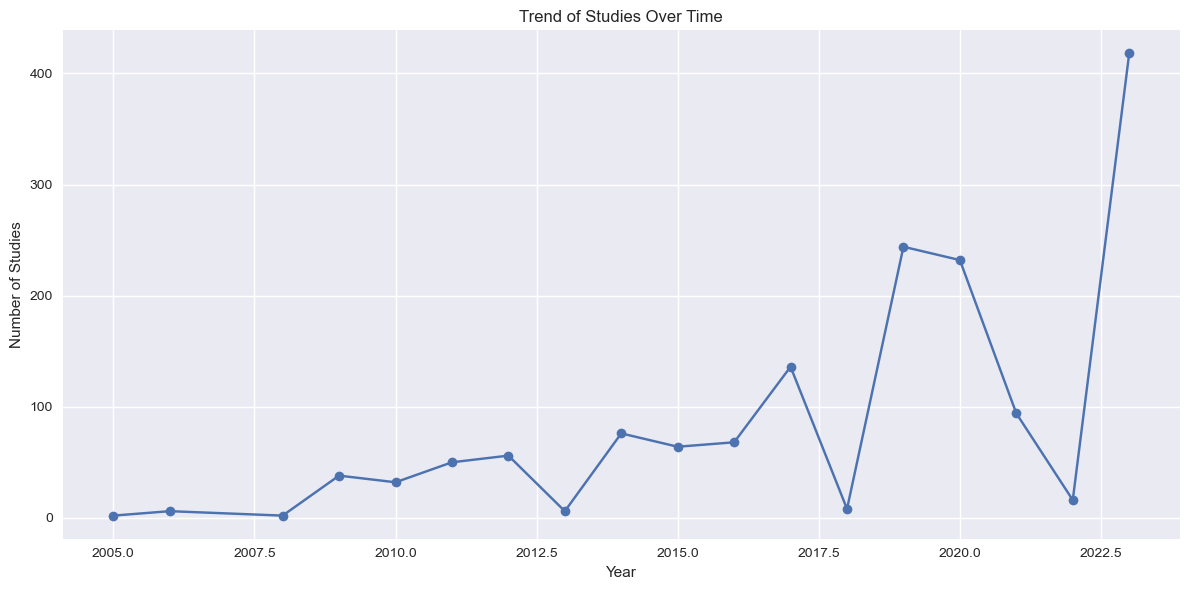

In [26]:
# Study Distribution Over Time
plt.figure(figsize=(12, 6))
df_cleaned['YEAR'] = pd.to_datetime(df_cleaned['DATE']).dt.year
yearly_studies = df_cleaned['YEAR'].value_counts().sort_index()
plt.plot(yearly_studies.index, yearly_studies.values, marker='o')
plt.title('Trend of Studies Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Studies')
plt.grid(True)
plt.tight_layout()
plt.show()

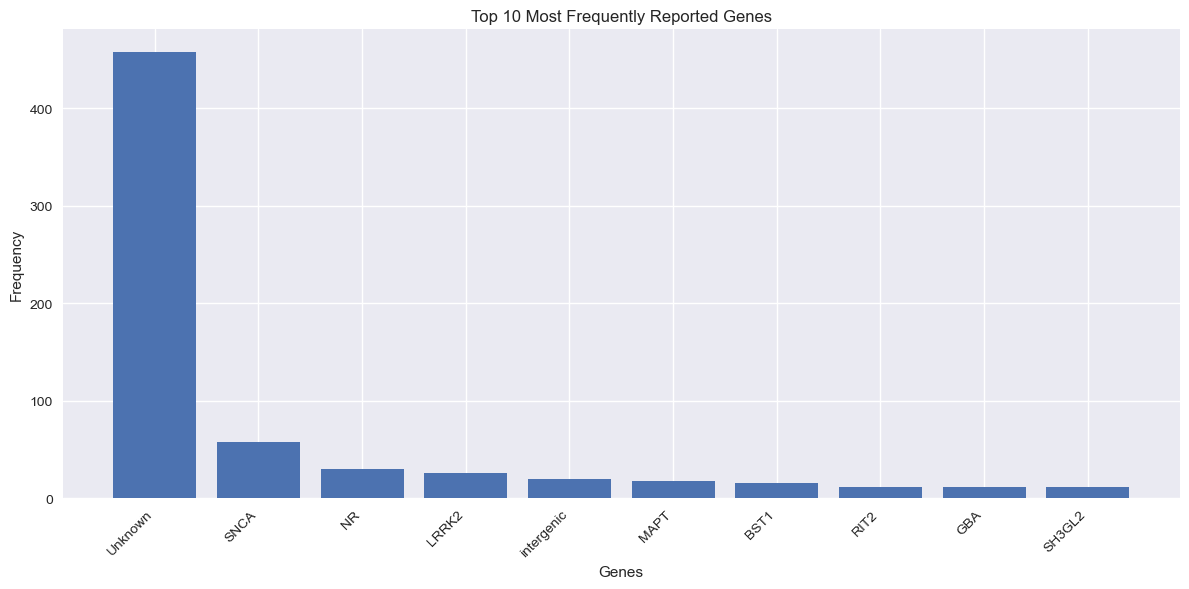

\Top 10 Most Reported Genes:
REPORTED GENE(S)
Unknown       458
SNCA           58
NR             30
LRRK2          26
intergenic     20
MAPT           18
BST1           16
RIT2           12
GBA            12
SH3GL2         12
Name: count, dtype: int64


In [27]:
# Genetic Correlation Analysis
plt.figure(figsize=(12, 6))
gene_counts = df['REPORTED GENE(S)'].value_counts().head(10)
plt.bar(range(len(gene_counts)), gene_counts.values)
plt.xticks(range(len(gene_counts)), gene_counts.index, rotation=45, ha='right')
plt.title('Top 10 Most Frequently Reported Genes')
plt.xlabel('Genes')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("\Top 10 Most Reported Genes:")
print(gene_counts)

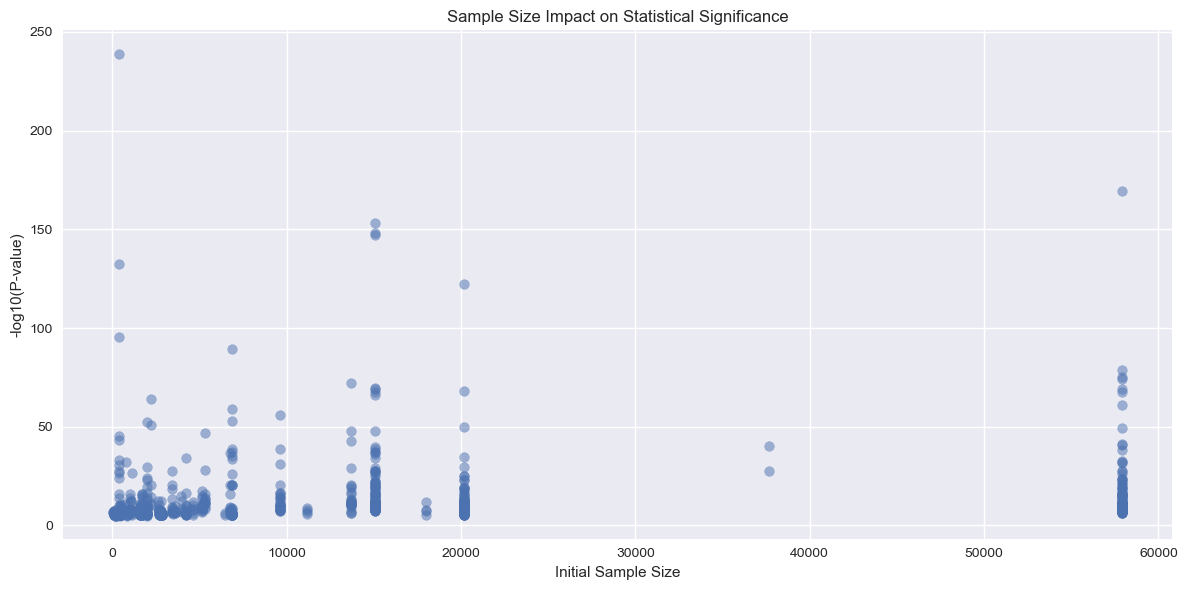

In [28]:
# Sample Size Impact Analysis
plt.figure(figsize=(12, 6))
df['INITIAL'] = pd.to_numeric(df['INITIAL'], errors='coerce')
df['PVALUE_MLOG'] = pd.to_numeric(df['PVALUE_MLOG'], errors='coerce')

plt.scatter(df['INITIAL'], df['PVALUE_MLOG'], alpha=0.5)
plt.title('Sample Size Impact on Statistical Significance')
plt.xlabel('Initial Sample Size')
plt.ylabel('-log10(P-value)')
plt.tight_layout()
plt.show()

C:\Users\PMYLS\AppData\Local\Temp\ipykernel_18032\1457286824.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1400x700 with 0 Axes>

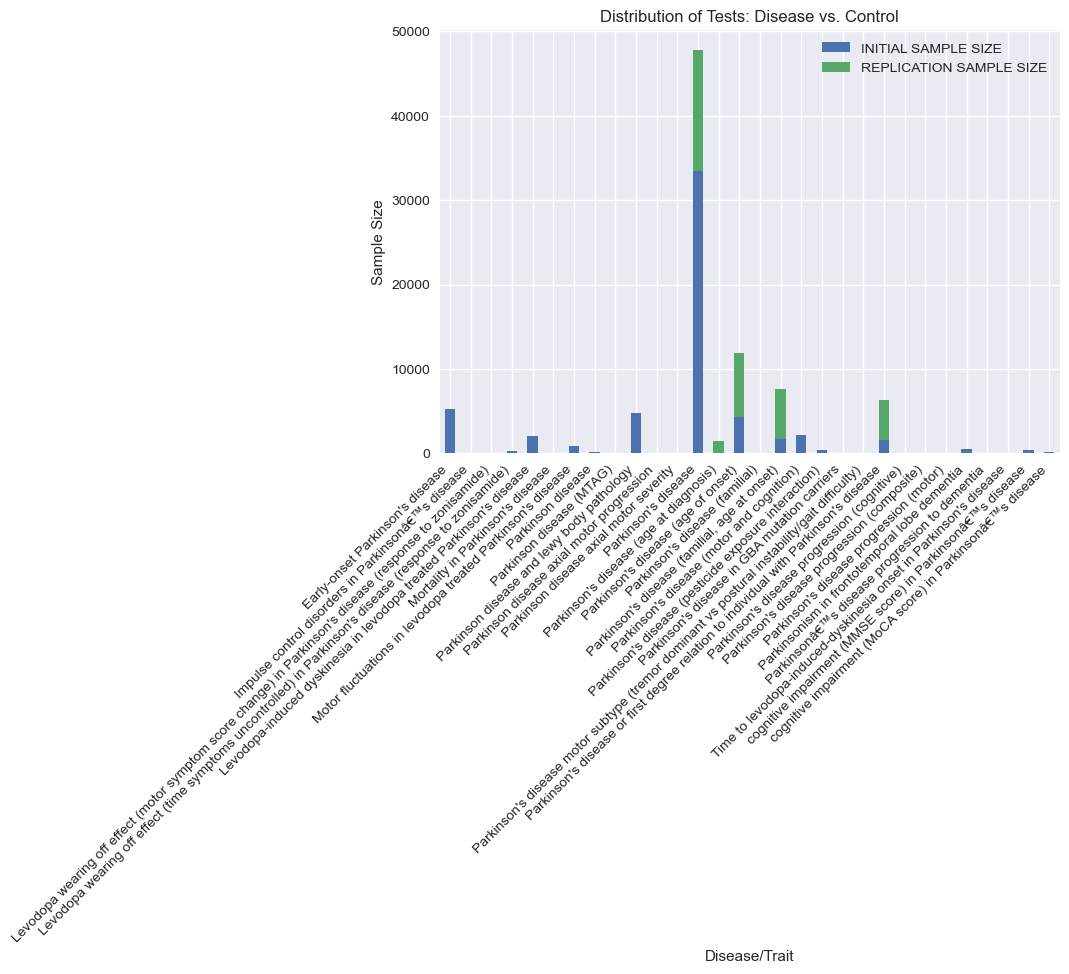

Outcome Summary:
                                                    INITIAL SAMPLE SIZE  \
DISEASE/TRAIT                                                             
Early-onset Parkinson's disease                                  5239.0   
Impulse control disorders in Parkinsonâ€™s disease                  4.0   
Levodopa wearing off effect (motor symptom scor...                 67.0   
Levodopa wearing off effect (time symptoms unco...                268.0   
Levodopa-induced dyskinesia in levodopa treated...               2064.0   

                                                    REPLICATION SAMPLE SIZE  
DISEASE/TRAIT                                                                
Early-onset Parkinson's disease                                         0.0  
Impulse control disorders in Parkinsonâ€™s disease                      0.0  
Levodopa wearing off effect (motor symptom scor...                      0.0  
Levodopa wearing off effect (time symptoms unco...                 

In [29]:
# Clean and prepare the data
df['INITIAL SAMPLE SIZE'] = df['INITIAL SAMPLE SIZE'].str.extract('(\d+)').astype(float)
df['REPLICATION SAMPLE SIZE'] = df['REPLICATION SAMPLE SIZE'].str.extract('(\d+)').astype(float)

# Summarize the data for disease vs. control
outcome_summary = df.groupby('DISEASE/TRAIT')[['INITIAL SAMPLE SIZE', 'REPLICATION SAMPLE SIZE']].sum()

# Plotting the results
plt.figure(figsize=(14, 7))
outcome_summary.plot(kind='bar', stacked=True)
plt.title('Distribution of Tests: Disease vs. Control')
plt.xlabel('Disease/Trait')
plt.ylabel('Sample Size')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\
Outcome Summary:")
print(outcome_summary.head())

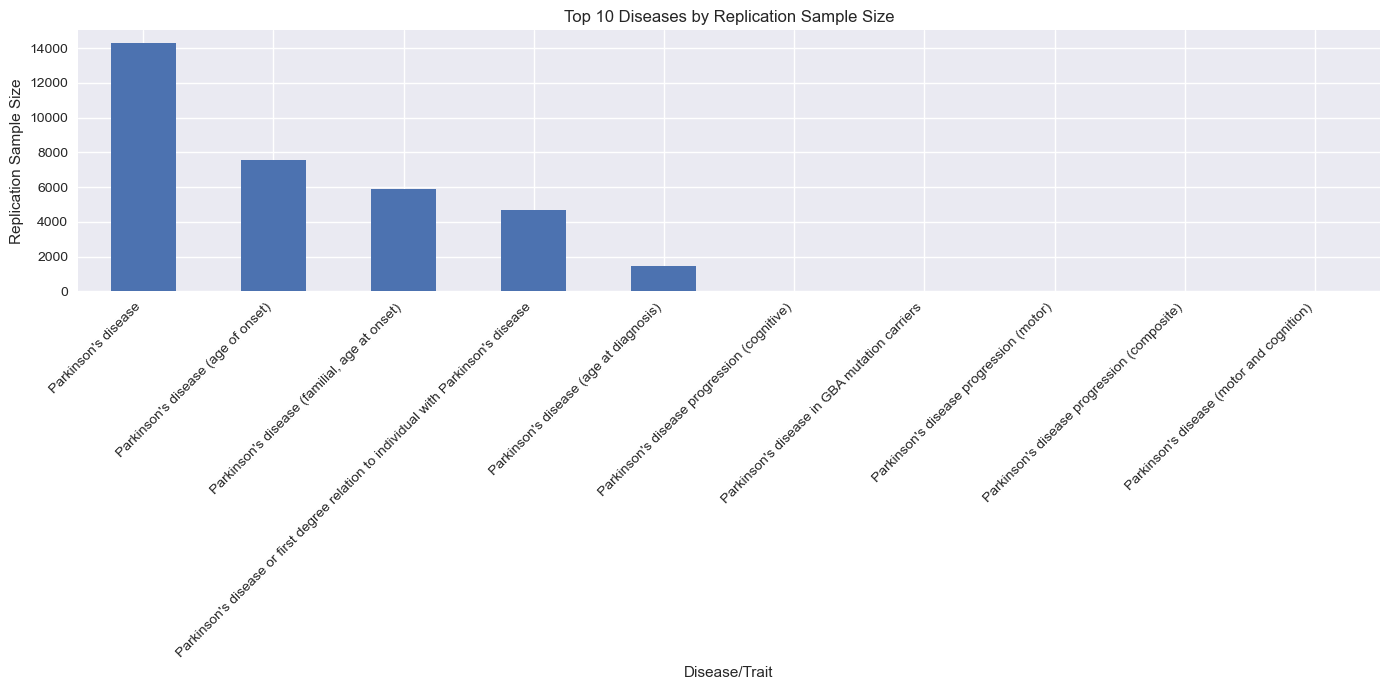

\Top 10 Diseases by Replication Sample Size:
DISEASE/TRAIT
Parkinson's disease                                                                    14304.0
Parkinson's disease (age of onset)                                                      7554.0
Parkinson's disease (familial, age at onset)                                            5896.0
Parkinson's disease or first degree relation to individual with Parkinson's disease     4708.0
Parkinson's disease (age at diagnosis)                                                  1452.0
Parkinson's disease progression (cognitive)                                               20.0
Parkinson's disease in GBA mutation carriers                                               4.0
Parkinson's disease progression (motor)                                                    0.0
Parkinson's disease progression (composite)                                                0.0
Parkinson's disease (motor and cognition)                                             

In [30]:
# Plotting replication sample sizes for each disease/trait
plt.figure(figsize=(14, 7))
replication_summary = df.groupby('DISEASE/TRAIT')['REPLICATION SAMPLE SIZE'].sum().sort_values(ascending=False).head(10)

replication_summary.plot(kind='bar')
plt.title('Top 10 Diseases by Replication Sample Size')
plt.xlabel('Disease/Trait')
plt.ylabel('Replication Sample Size')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\Top 10 Diseases by Replication Sample Size:")
print(replication_summary)

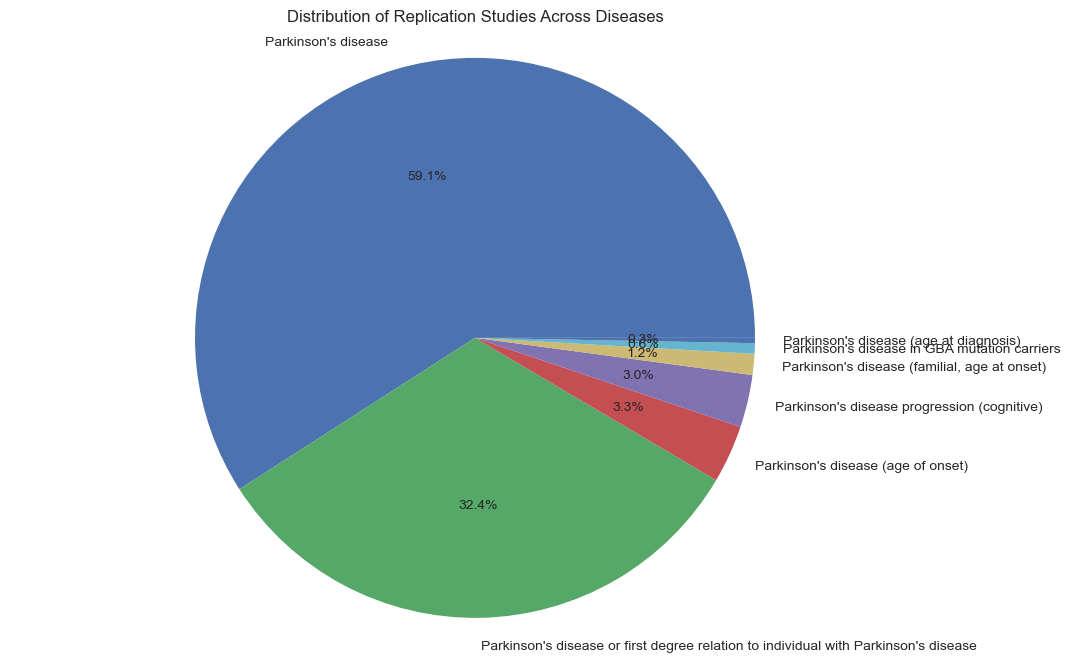

In [31]:
# pie chart to show the distribution of replication sample sizes
plt.figure(figsize=(12, 8))
replication_pie = df[df['REPLICATION SAMPLE SIZE'] > 0]['DISEASE/TRAIT'].value_counts()
plt.pie(replication_pie.values, labels=replication_pie.index, autopct='%1.1f%%')
plt.title('Distribution of Replication Studies Across Diseases')
plt.axis('equal')
plt.show()

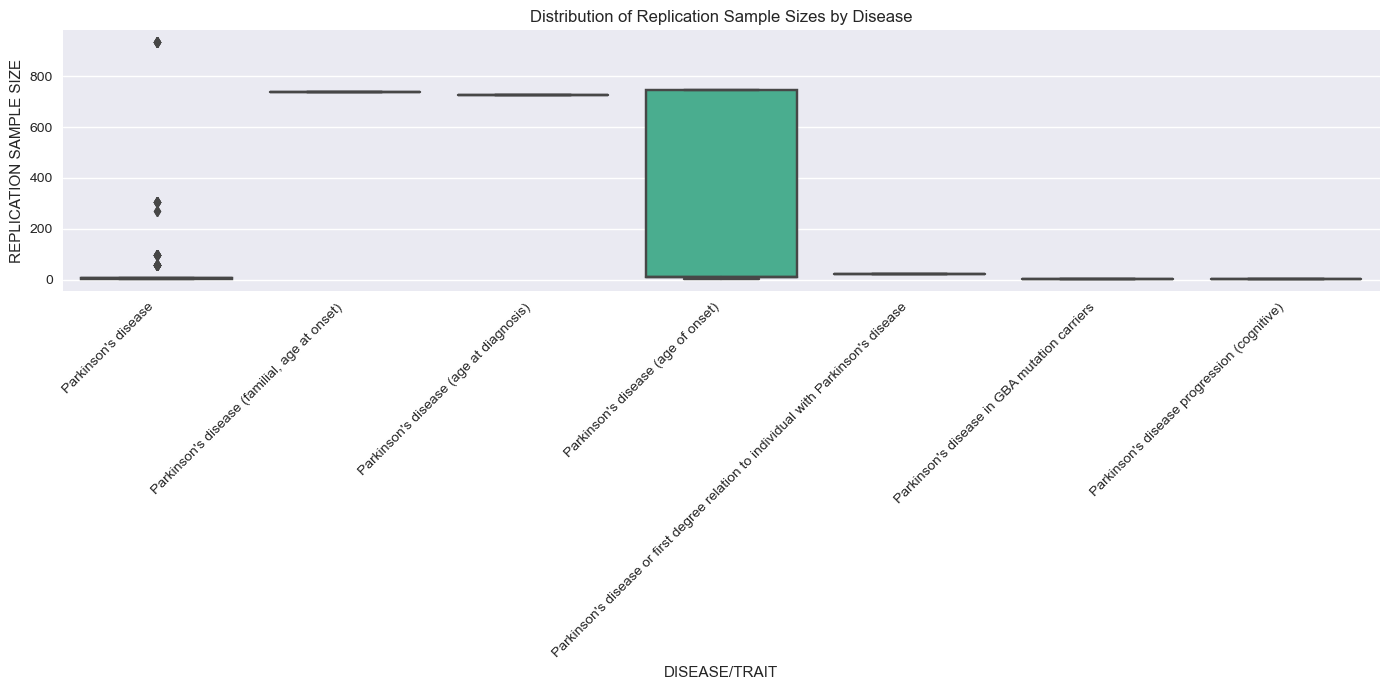

Summary Statistics for Replication Sample Sizes:
count    660.000000
mean      51.421212
std      162.422690
min        1.000000
25%        5.000000
50%        7.500000
75%       22.000000
max      933.000000
Name: REPLICATION SAMPLE SIZE, dtype: float64


In [32]:
# box plot to show the distribution of replication sample sizes
plt.figure(figsize=(14, 7))
df_filtered = df[df['REPLICATION SAMPLE SIZE'] > 0]
sns.boxplot(x='DISEASE/TRAIT', y='REPLICATION SAMPLE SIZE', data=df_filtered)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Replication Sample Sizes by Disease')
plt.tight_layout()
plt.show()

# Print summary statistics
print("\
Summary Statistics for Replication Sample Sizes:")
print(df['REPLICATION SAMPLE SIZE'].describe())

<Figure size 1400x700 with 0 Axes>

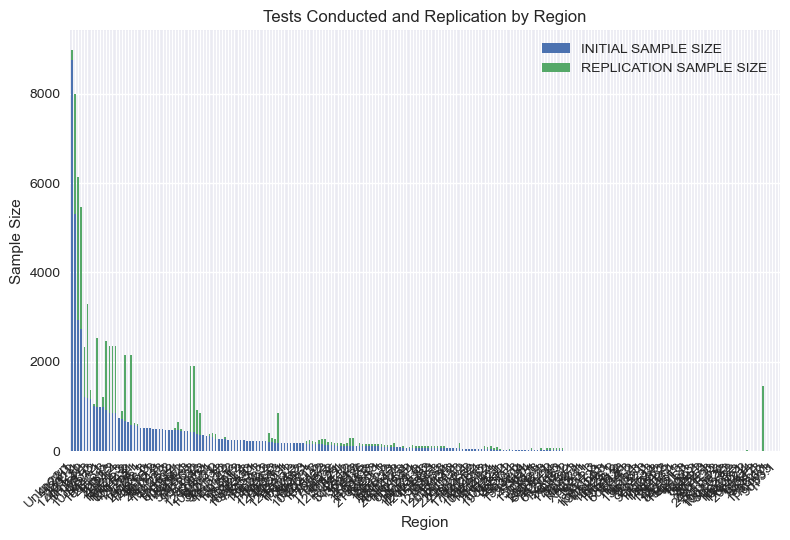

Region Summary:
          INITIAL SAMPLE SIZE  REPLICATION SAMPLE SIZE
REGION                                                
Unknown                8757.0                    210.0
4q22.1                 5314.0                   2686.0
12q12                  2925.0                   3216.0
1q32.1                 2727.0                   2738.0
17q21.31               1206.0                   1126.0


In [33]:
# Grouping the data by region and summarizing the relevant metrics
region_summary = df.groupby('REGION').agg({'INITIAL SAMPLE SIZE': 'sum', 'REPLICATION SAMPLE SIZE': 'sum'}).sort_values(by='INITIAL SAMPLE SIZE', ascending=False)

# Plotting the results
plt.figure(figsize=(14, 7))
region_summary.plot(kind='bar', stacked=True)
plt.title('Tests Conducted and Replication by Region')
plt.xlabel('Region')
plt.ylabel('Sample Size')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\
Region Summary:")
print(region_summary.head())

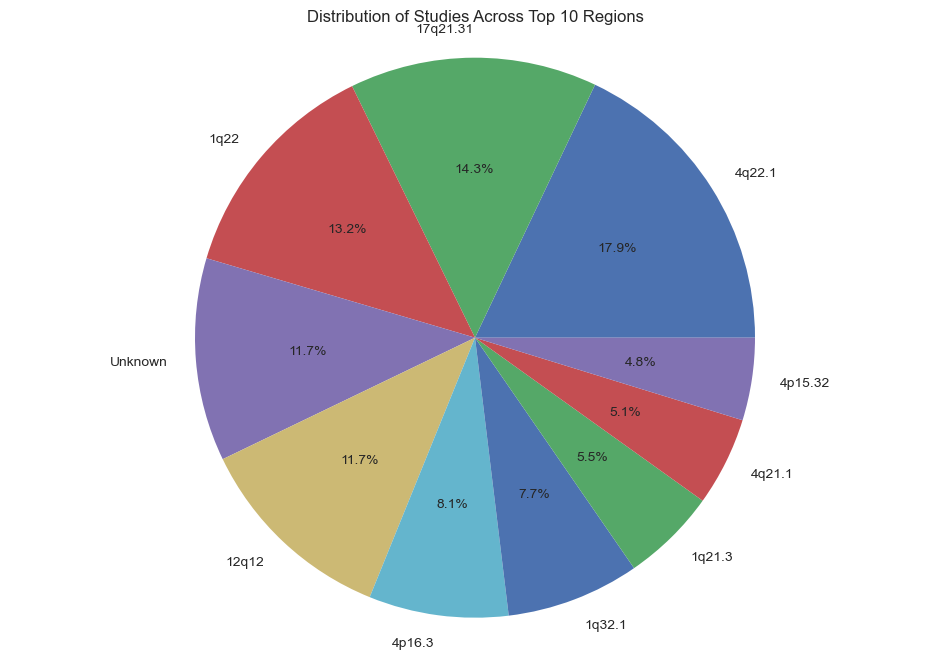

Total number of studies by region:
REGION
4q22.1      98
17q21.31    78
1q22        72
Unknown     64
12q12       64
4p16.3      44
1q32.1      42
1q21.3      30
4q21.1      28
4p15.32     26
Name: count, dtype: int64


In [34]:
# pie chart to show the distribution of studies across regions
plt.figure(figsize=(12, 8))
region_counts = df['REGION'].value_counts()
plt.pie(region_counts.head(10), labels=region_counts.head(10).index, autopct='%1.1f%%')
plt.title('Distribution of Studies Across Top 10 Regions')
plt.axis('equal')
plt.show()

print("\
Total number of studies by region:")
print(region_counts.head(10))